In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

In [131]:
customer_db = pd.read_csv('Customers.csv')
transaction_db = pd.read_csv('Transactions.csv')
final_df = pd.merge(customer_db, transaction_db, on='CustomerID')

# **Data PreProcessing**

In [132]:
final_df.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64


In [133]:
final_df.drop (['CustomerID','SignupDate','TransactionID','ProductID','TransactionDate'], axis = 1, inplace = True)

In [134]:
scaler = StandardScaler()
final_df['TotalValue'] = scaler.fit_transform(final_df[['TotalValue']])
final_df['Price'] = scaler.fit_transform(final_df[['Price']])

In [135]:
labelencoder = LabelEncoder()
final_df['CustomerName'] = labelencoder.fit_transform(final_df['CustomerName'])
final_df['Region'] = labelencoder.fit_transform(final_df['Region'])

In [136]:
final_df

,CustomerName,Region,Quantity,TotalValue,Price
0,118,3,2,-1.167373,-1.530249
1,118,3,3,-0.562745,-0.959820
2,118,3,2,-0.152274,0.248219
3,118,3,2,0.449270,1.302134
4,118,3,3,1.239454,1.145166
...,...,...,...,...,...
995,105,0,4,0.361544,-0.394581
996,105,0,1,-0.913568,-0.233561
997,105,0,4,-0.126102,-0.821763
998,105,0,4,1.979324,1.022606


# **Choosing right number of Clusters**

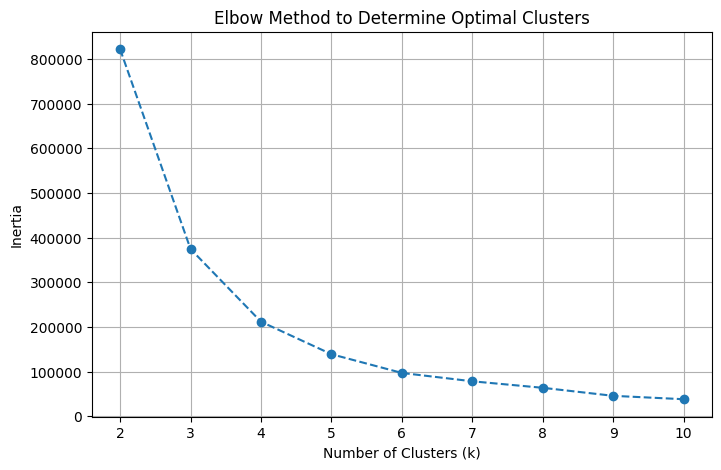

In [137]:
inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(final_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [138]:
kmeans = KMeans(n_clusters=5, random_state=42)
final_df['Cluster'] = kmeans.fit_predict(final_df)

In [139]:
final_df

,CustomerName,Region,Quantity,TotalValue,Price,Cluster
0,118,3,2,-1.167373,-1.530249,3
1,118,3,3,-0.562745,-0.959820,3
2,118,3,2,-0.152274,0.248219,3
3,118,3,2,0.449270,1.302134,3
4,118,3,3,1.239454,1.145166,3
...,...,...,...,...,...,...
995,105,0,4,0.361544,-0.394581,2
996,105,0,1,-0.913568,-0.233561,2
997,105,0,4,-0.126102,-0.821763,2
998,105,0,4,1.979324,1.022606,2


# **Evaluating Relevant metrices**

In [142]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(final_df, final_df['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(final_df, final_df['Cluster'])
print(f"Davies-Bouldin Index: {db_index:.4f}")


Silhouette Score: 0.5421
Davies-Bouldin Index: 0.5263


In [144]:
cluster_sizes = final_df['Cluster'].value_counts()
print("Cluster Sizes:\n", cluster_sizes)


Cluster Sizes:
 Cluster
3    217
2    209
0    206
4    185
1    183
Name: count, dtype: int64


# **Plotting Clusters**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


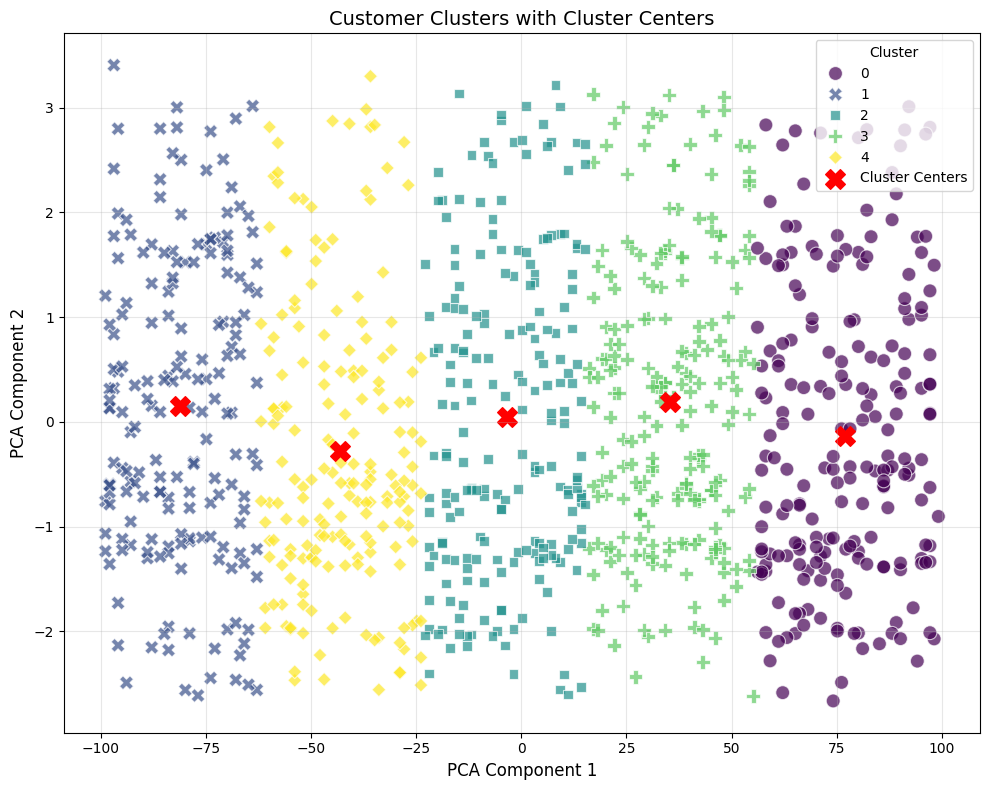

In [147]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(final_df.drop(columns=['Cluster']))
final_df['PCA1'] = pca_features[:, 0]
final_df['PCA2'] = pca_features[:, 1]

plt.figure(figsize=(10, 8))
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)

sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',
    data=final_df,
    palette='viridis',
    style='Cluster',
    s=100,
    alpha=0.7
)

# Plot the cluster centers
plt.scatter(
    cluster_centers_pca[:, 0], cluster_centers_pca[:, 1],
    color='red',
    marker='X',
    s=200,
    label='Cluster Centers'
)

# Customize the plot
plt.title('Customer Clusters with Cluster Centers', fontsize=14)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
